# Testing the API

We will now test the API we just created.  
Here are some images that we will use to test the API.

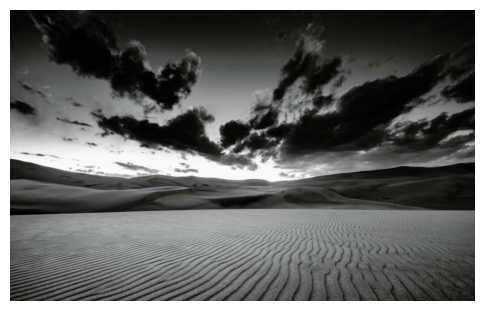

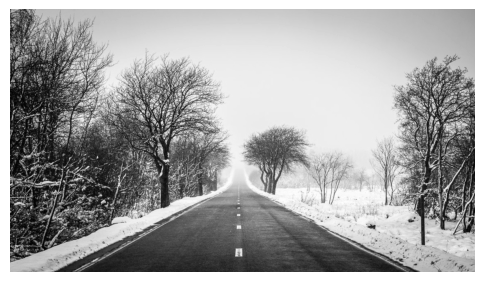

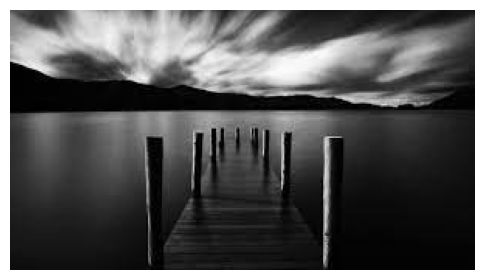

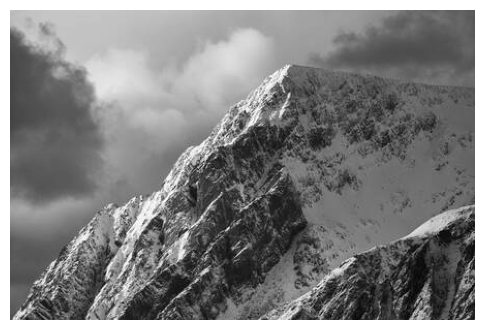

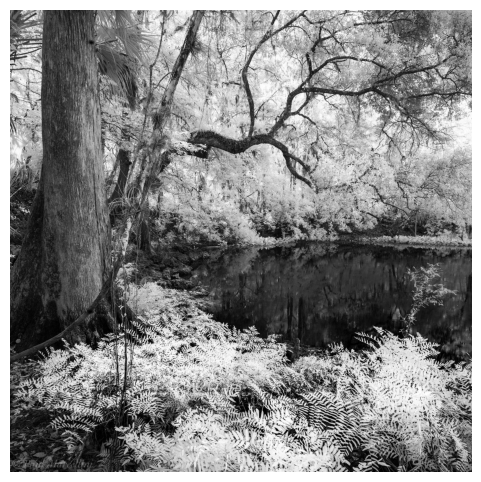

In [1]:
import PIL
import matplotlib.pyplot as plt

for i in range(1,6):
    plt.figure(figsize=(6,6))
    plt.imshow(PIL.Image.open(f'../sample_images/img{i}.jpg'), cmap='gray')
    plt.axis('off')

We will use the `requests` library to send HTTP requests to the API.
We need to specify the URL of the API endpoint and the HTTP method to use (POST in our case).  
We also need to specify the data to send in the request body. This data will be sent as a JSON string. We can use the `json` parameter in the `requests` library to automatically convert a dictionary to a JSON string before sending the request.  
Let's try calling the API with on the 10th first images we showed earlier.

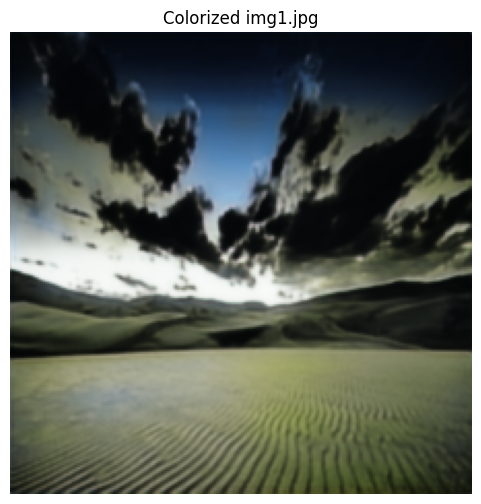

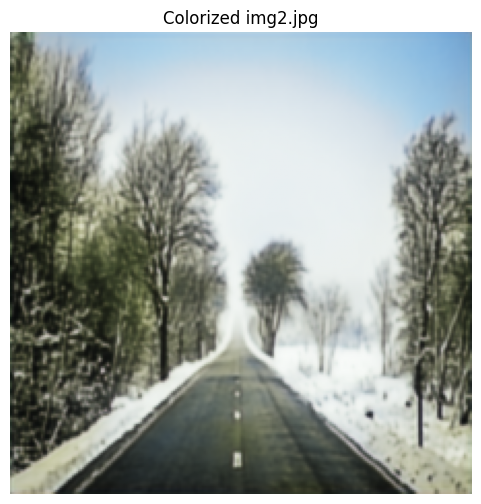

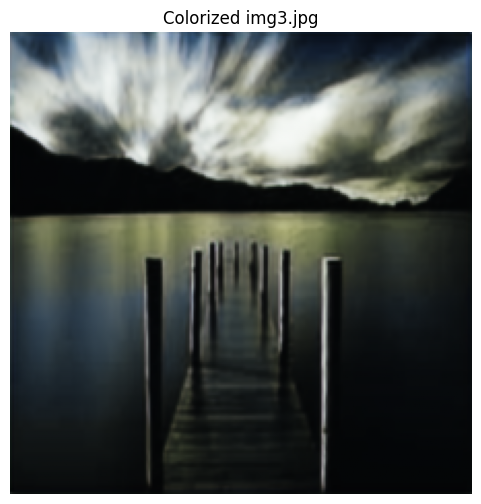

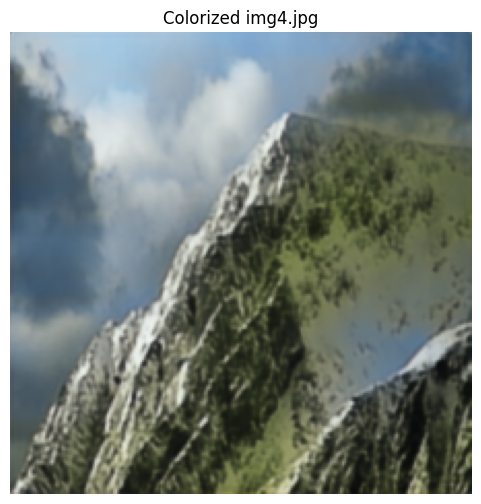

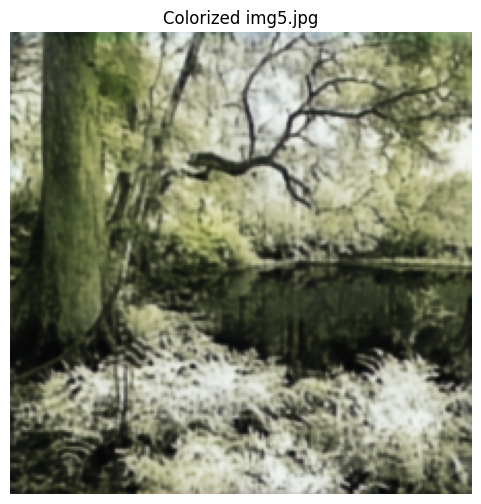

In [2]:
import requests
import io
import numpy as np 

for i in range(1,6):
    # Convert image to bytes
    image = PIL.Image.open(f'../sample_images/img{i}.jpg')
    img_binary = io.BytesIO()
    image.save(img_binary, format="PNG")
    # Send request to the API
    response = requests.post("http://127.0.0.1:5000/predict", data=img_binary.getvalue())
    
    # Check if the request was successful
    if response.status_code == 200:
        # Convert response content to a PIL Image
        response_image = PIL.Image.open(io.BytesIO(response.content))
        
        # Plot the returned image
        plt.figure(figsize=(6,6))
        plt.imshow(np.array(response_image)/255.)
        plt.title(f"Colorized img{i}.jpg")
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to get response for img{i}.jpg. Status code: {response.status_code}")
